## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  32.425135   534.201498  0.604844  4.080824  1.526472
1  54.691078   154.237754  0.095699  7.087253  0.253123
2  34.599436   268.324567  0.057734  8.660839  0.300660
3  99.681923  1219.558264  0.846486  3.480567  1.607307
4  69.421411  1247.705396  0.822774  9.866843  1.530526


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.24346 | train_mse: 6.50778 | train_mae: 1.77421 |  0:00:00s
epoch 1  | loss: 1.0952  | train_mse: 4.38442 | train_mae: 1.52778 |  0:00:00s


epoch 2  | loss: 0.84044 | train_mse: 3.49155 | train_mae: 1.3887  |  0:00:00s
epoch 3  | loss: 1.01713 | train_mse: 2.86342 | train_mae: 1.27191 |  0:00:00s
epoch 4  | loss: 0.85378 | train_mse: 2.41215 | train_mae: 1.18986 |  0:00:00s


epoch 5  | loss: 0.83835 | train_mse: 2.11098 | train_mae: 1.10703 |  0:00:00s
epoch 6  | loss: 0.85596 | train_mse: 1.80291 | train_mae: 1.02676 |  0:00:00s
epoch 7  | loss: 0.82045 | train_mse: 1.55146 | train_mae: 0.94662 |  0:00:00s


epoch 8  | loss: 0.75028 | train_mse: 1.34508 | train_mae: 0.87914 |  0:00:01s
epoch 9  | loss: 0.66609 | train_mse: 1.13507 | train_mae: 0.80045 |  0:00:01s
epoch 10 | loss: 0.68787 | train_mse: 1.0411  | train_mae: 0.76534 |  0:00:01s


epoch 11 | loss: 0.59494 | train_mse: 0.98392 | train_mae: 0.74434 |  0:00:01s
epoch 12 | loss: 0.71755 | train_mse: 0.96157 | train_mae: 0.73215 |  0:00:01s


epoch 13 | loss: 0.58149 | train_mse: 0.91078 | train_mae: 0.71266 |  0:00:01s
epoch 14 | loss: 0.64447 | train_mse: 0.86817 | train_mae: 0.69302 |  0:00:01s
epoch 15 | loss: 0.66038 | train_mse: 0.82878 | train_mae: 0.67325 |  0:00:01s


epoch 16 | loss: 0.57365 | train_mse: 0.78936 | train_mae: 0.64692 |  0:00:01s
epoch 17 | loss: 0.58539 | train_mse: 0.76514 | train_mae: 0.62575 |  0:00:01s
epoch 18 | loss: 0.57136 | train_mse: 0.73538 | train_mae: 0.60558 |  0:00:01s


epoch 19 | loss: 0.66076 | train_mse: 0.71596 | train_mae: 0.5955  |  0:00:02s
epoch 20 | loss: 0.66536 | train_mse: 0.6858  | train_mae: 0.58365 |  0:00:02s
epoch 21 | loss: 0.51157 | train_mse: 0.66805 | train_mae: 0.57603 |  0:00:02s


epoch 22 | loss: 0.39971 | train_mse: 0.6379  | train_mae: 0.56308 |  0:00:02s
epoch 23 | loss: 0.50184 | train_mse: 0.61519 | train_mae: 0.55421 |  0:00:02s


epoch 24 | loss: 0.406   | train_mse: 0.58816 | train_mae: 0.54078 |  0:00:02s
epoch 25 | loss: 0.35831 | train_mse: 0.55473 | train_mae: 0.52883 |  0:00:02s
epoch 26 | loss: 0.34593 | train_mse: 0.51775 | train_mae: 0.51876 |  0:00:02s


epoch 27 | loss: 0.46622 | train_mse: 0.49682 | train_mae: 0.5116  |  0:00:02s
epoch 28 | loss: 0.43937 | train_mse: 0.47247 | train_mae: 0.50171 |  0:00:02s
epoch 29 | loss: 0.44714 | train_mse: 0.44896 | train_mae: 0.49096 |  0:00:02s


epoch 30 | loss: 0.32957 | train_mse: 0.41548 | train_mae: 0.47491 |  0:00:03s
epoch 31 | loss: 0.3259  | train_mse: 0.38479 | train_mae: 0.45884 |  0:00:03s
epoch 32 | loss: 0.27928 | train_mse: 0.35695 | train_mae: 0.44188 |  0:00:03s


epoch 33 | loss: 0.41897 | train_mse: 0.33708 | train_mae: 0.43107 |  0:00:03s
epoch 34 | loss: 0.41392 | train_mse: 0.31497 | train_mae: 0.41898 |  0:00:03s


epoch 35 | loss: 0.42053 | train_mse: 0.28782 | train_mae: 0.40089 |  0:00:03s
epoch 36 | loss: 0.3553  | train_mse: 0.26762 | train_mae: 0.38657 |  0:00:03s
epoch 37 | loss: 0.32578 | train_mse: 0.25091 | train_mae: 0.37731 |  0:00:03s


epoch 38 | loss: 0.27744 | train_mse: 0.23693 | train_mae: 0.36932 |  0:00:03s
epoch 39 | loss: 0.33757 | train_mse: 0.23045 | train_mae: 0.36604 |  0:00:03s
epoch 40 | loss: 0.30052 | train_mse: 0.22581 | train_mae: 0.36362 |  0:00:04s


epoch 41 | loss: 0.38886 | train_mse: 0.22385 | train_mae: 0.36043 |  0:00:04s
epoch 42 | loss: 0.28017 | train_mse: 0.22288 | train_mae: 0.35757 |  0:00:04s
epoch 43 | loss: 0.59671 | train_mse: 0.22278 | train_mae: 0.35642 |  0:00:04s


epoch 44 | loss: 0.42075 | train_mse: 0.21567 | train_mae: 0.35262 |  0:00:04s


epoch 45 | loss: 0.43068 | train_mse: 0.20958 | train_mae: 0.34799 |  0:00:04s
epoch 46 | loss: 0.21947 | train_mse: 0.2052  | train_mae: 0.34651 |  0:00:04s
epoch 47 | loss: 0.42307 | train_mse: 0.20281 | train_mae: 0.34622 |  0:00:04s


epoch 48 | loss: 0.218   | train_mse: 0.19917 | train_mae: 0.34443 |  0:00:04s
epoch 49 | loss: 0.26238 | train_mse: 0.19694 | train_mae: 0.34537 |  0:00:04s
epoch 50 | loss: 0.22361 | train_mse: 0.19589 | train_mae: 0.34517 |  0:00:05s


epoch 51 | loss: 0.23902 | train_mse: 0.19247 | train_mae: 0.34104 |  0:00:05s
epoch 52 | loss: 0.29906 | train_mse: 0.18903 | train_mae: 0.33892 |  0:00:05s
epoch 53 | loss: 0.24505 | train_mse: 0.18654 | train_mae: 0.3365  |  0:00:05s


epoch 54 | loss: 0.25135 | train_mse: 0.18532 | train_mae: 0.3325  |  0:00:05s
epoch 55 | loss: 0.25085 | train_mse: 0.18197 | train_mae: 0.32742 |  0:00:05s


epoch 56 | loss: 0.347   | train_mse: 0.18193 | train_mae: 0.32481 |  0:00:05s
epoch 57 | loss: 0.29278 | train_mse: 0.18437 | train_mae: 0.32705 |  0:00:05s
epoch 58 | loss: 0.44555 | train_mse: 0.18099 | train_mae: 0.32247 |  0:00:05s


epoch 59 | loss: 0.31036 | train_mse: 0.17722 | train_mae: 0.31892 |  0:00:05s
epoch 60 | loss: 0.26308 | train_mse: 0.17483 | train_mae: 0.31797 |  0:00:05s
epoch 61 | loss: 0.32053 | train_mse: 0.17286 | train_mae: 0.31607 |  0:00:06s


epoch 62 | loss: 0.17011 | train_mse: 0.16921 | train_mae: 0.31338 |  0:00:06s
epoch 63 | loss: 0.18899 | train_mse: 0.16034 | train_mae: 0.30344 |  0:00:06s
epoch 64 | loss: 0.17857 | train_mse: 0.16152 | train_mae: 0.30795 |  0:00:06s


epoch 65 | loss: 0.27868 | train_mse: 0.16303 | train_mae: 0.31302 |  0:00:06s
epoch 66 | loss: 0.24217 | train_mse: 0.1633  | train_mae: 0.31667 |  0:00:06s
epoch 67 | loss: 0.3291  | train_mse: 0.16227 | train_mae: 0.31742 |  0:00:06s


epoch 68 | loss: 0.28937 | train_mse: 0.15798 | train_mae: 0.31541 |  0:00:06s
epoch 69 | loss: 0.16585 | train_mse: 0.1567  | train_mae: 0.31417 |  0:00:06s
epoch 70 | loss: 0.29481 | train_mse: 0.15388 | train_mae: 0.30899 |  0:00:06s


epoch 71 | loss: 0.30389 | train_mse: 0.14869 | train_mae: 0.29933 |  0:00:06s
epoch 72 | loss: 0.3437  | train_mse: 0.14547 | train_mae: 0.29513 |  0:00:06s
epoch 73 | loss: 0.16865 | train_mse: 0.14406 | train_mae: 0.29341 |  0:00:07s


epoch 74 | loss: 0.3205  | train_mse: 0.14186 | train_mae: 0.28991 |  0:00:07s
epoch 75 | loss: 0.47922 | train_mse: 0.14512 | train_mae: 0.29233 |  0:00:07s
epoch 76 | loss: 0.16922 | train_mse: 0.14411 | train_mae: 0.29084 |  0:00:07s


epoch 77 | loss: 0.17043 | train_mse: 0.14211 | train_mae: 0.28907 |  0:00:07s
epoch 78 | loss: 0.15422 | train_mse: 0.13769 | train_mae: 0.28266 |  0:00:07s
epoch 79 | loss: 0.36713 | train_mse: 0.13665 | train_mae: 0.28141 |  0:00:07s


epoch 80 | loss: 0.19755 | train_mse: 0.13317 | train_mae: 0.27812 |  0:00:07s
epoch 81 | loss: 0.29416 | train_mse: 0.13208 | train_mae: 0.27999 |  0:00:07s


epoch 82 | loss: 0.2495  | train_mse: 0.13119 | train_mae: 0.27931 |  0:00:07s
epoch 83 | loss: 0.18778 | train_mse: 0.13284 | train_mae: 0.2836  |  0:00:07s
epoch 84 | loss: 0.23504 | train_mse: 0.13178 | train_mae: 0.28173 |  0:00:08s


epoch 85 | loss: 0.19312 | train_mse: 0.13036 | train_mae: 0.27897 |  0:00:08s
epoch 86 | loss: 0.157   | train_mse: 0.12431 | train_mae: 0.27258 |  0:00:08s
epoch 87 | loss: 0.32976 | train_mse: 0.12721 | train_mae: 0.2753  |  0:00:08s


epoch 88 | loss: 0.2144  | train_mse: 0.1272  | train_mae: 0.27227 |  0:00:08s
epoch 89 | loss: 0.1979  | train_mse: 0.12541 | train_mae: 0.27028 |  0:00:08s
epoch 90 | loss: 0.38203 | train_mse: 0.12723 | train_mae: 0.27147 |  0:00:08s


epoch 91 | loss: 0.2343  | train_mse: 0.12413 | train_mae: 0.26888 |  0:00:08s
epoch 92 | loss: 0.34802 | train_mse: 0.12031 | train_mae: 0.26608 |  0:00:08s
epoch 93 | loss: 0.31708 | train_mse: 0.11649 | train_mae: 0.26206 |  0:00:08s


epoch 94 | loss: 0.21696 | train_mse: 0.11475 | train_mae: 0.25928 |  0:00:08s
epoch 95 | loss: 0.63401 | train_mse: 0.11422 | train_mae: 0.25974 |  0:00:09s
epoch 96 | loss: 0.25228 | train_mse: 0.11419 | train_mae: 0.257   |  0:00:09s


epoch 97 | loss: 0.1639  | train_mse: 0.11053 | train_mae: 0.25347 |  0:00:09s
epoch 98 | loss: 0.24537 | train_mse: 0.10734 | train_mae: 0.25035 |  0:00:09s


epoch 99 | loss: 0.22189 | train_mse: 0.10655 | train_mae: 0.24989 |  0:00:09s
epoch 100| loss: 0.18524 | train_mse: 0.10812 | train_mae: 0.25309 |  0:00:09s
epoch 101| loss: 0.15877 | train_mse: 0.11057 | train_mae: 0.25551 |  0:00:09s


epoch 102| loss: 0.22568 | train_mse: 0.10904 | train_mae: 0.25464 |  0:00:09s
epoch 103| loss: 0.35474 | train_mse: 0.10843 | train_mae: 0.25562 |  0:00:09s
epoch 104| loss: 0.13528 | train_mse: 0.09956 | train_mae: 0.24308 |  0:00:09s


epoch 105| loss: 0.24289 | train_mse: 0.09507 | train_mae: 0.2398  |  0:00:10s
epoch 106| loss: 0.2894  | train_mse: 0.09363 | train_mae: 0.23479 |  0:00:10s
epoch 107| loss: 0.1672  | train_mse: 0.09181 | train_mae: 0.23192 |  0:00:10s


epoch 108| loss: 0.22564 | train_mse: 0.08625 | train_mae: 0.22476 |  0:00:10s
epoch 109| loss: 0.30529 | train_mse: 0.08739 | train_mae: 0.22369 |  0:00:10s


epoch 110| loss: 0.2079  | train_mse: 0.08728 | train_mae: 0.22307 |  0:00:10s
epoch 111| loss: 0.32544 | train_mse: 0.08983 | train_mae: 0.2268  |  0:00:10s
epoch 112| loss: 0.25531 | train_mse: 0.09377 | train_mae: 0.22973 |  0:00:10s


epoch 113| loss: 0.15498 | train_mse: 0.09566 | train_mae: 0.22855 |  0:00:10s
epoch 114| loss: 0.18183 | train_mse: 0.0953  | train_mae: 0.22594 |  0:00:10s
epoch 115| loss: 0.15651 | train_mse: 0.0937  | train_mae: 0.22223 |  0:00:10s


epoch 116| loss: 0.2013  | train_mse: 0.09205 | train_mae: 0.21974 |  0:00:11s
epoch 117| loss: 0.30582 | train_mse: 0.08887 | train_mae: 0.2172  |  0:00:11s
epoch 118| loss: 0.188   | train_mse: 0.0845  | train_mae: 0.21011 |  0:00:11s


epoch 119| loss: 0.20885 | train_mse: 0.082   | train_mae: 0.20943 |  0:00:11s
epoch 120| loss: 0.19911 | train_mse: 0.07971 | train_mae: 0.20849 |  0:00:11s


epoch 121| loss: 0.11977 | train_mse: 0.07967 | train_mae: 0.20808 |  0:00:11s
epoch 122| loss: 0.19733 | train_mse: 0.07816 | train_mae: 0.20361 |  0:00:11s
epoch 123| loss: 0.31628 | train_mse: 0.07789 | train_mae: 0.20307 |  0:00:11s


epoch 124| loss: 0.27149 | train_mse: 0.07822 | train_mae: 0.20634 |  0:00:11s
epoch 125| loss: 0.17746 | train_mse: 0.07747 | train_mae: 0.20649 |  0:00:12s
epoch 126| loss: 0.23048 | train_mse: 0.07429 | train_mae: 0.20225 |  0:00:12s


epoch 127| loss: 0.27326 | train_mse: 0.07392 | train_mae: 0.20129 |  0:00:12s
epoch 128| loss: 0.20748 | train_mse: 0.07333 | train_mae: 0.20003 |  0:00:12s
epoch 129| loss: 0.14809 | train_mse: 0.073   | train_mae: 0.19735 |  0:00:12s


epoch 130| loss: 0.19934 | train_mse: 0.07628 | train_mae: 0.20277 |  0:00:12s
epoch 131| loss: 0.25268 | train_mse: 0.07698 | train_mae: 0.20402 |  0:00:12s


epoch 132| loss: 0.1248  | train_mse: 0.07878 | train_mae: 0.20719 |  0:00:12s
epoch 133| loss: 0.42953 | train_mse: 0.07957 | train_mae: 0.20982 |  0:00:12s
epoch 134| loss: 0.2129  | train_mse: 0.07796 | train_mae: 0.20967 |  0:00:12s


epoch 135| loss: 0.34712 | train_mse: 0.08114 | train_mae: 0.21553 |  0:00:13s
epoch 136| loss: 0.24704 | train_mse: 0.08328 | train_mae: 0.21943 |  0:00:13s
epoch 137| loss: 0.21121 | train_mse: 0.08108 | train_mae: 0.21788 |  0:00:13s


epoch 138| loss: 0.2548  | train_mse: 0.08142 | train_mae: 0.21655 |  0:00:13s
epoch 139| loss: 0.25259 | train_mse: 0.08294 | train_mae: 0.2184  |  0:00:13s


epoch 140| loss: 0.12875 | train_mse: 0.08221 | train_mae: 0.21871 |  0:00:13s
epoch 141| loss: 0.16282 | train_mse: 0.08209 | train_mae: 0.21954 |  0:00:13s
epoch 142| loss: 0.27636 | train_mse: 0.07965 | train_mae: 0.21673 |  0:00:13s


epoch 143| loss: 0.30879 | train_mse: 0.07737 | train_mae: 0.21307 |  0:00:13s
epoch 144| loss: 0.22507 | train_mse: 0.07975 | train_mae: 0.21447 |  0:00:13s
epoch 145| loss: 0.25424 | train_mse: 0.08568 | train_mae: 0.21879 |  0:00:13s


epoch 146| loss: 0.26723 | train_mse: 0.0865  | train_mae: 0.2193  |  0:00:14s
epoch 147| loss: 0.24845 | train_mse: 0.08762 | train_mae: 0.22121 |  0:00:14s
epoch 148| loss: 0.22698 | train_mse: 0.08301 | train_mae: 0.21699 |  0:00:14s


epoch 149| loss: 0.17486 | train_mse: 0.0799  | train_mae: 0.21599 |  0:00:14s
epoch 150| loss: 0.36798 | train_mse: 0.07878 | train_mae: 0.2141  |  0:00:14s


epoch 151| loss: 0.1611  | train_mse: 0.077   | train_mae: 0.21004 |  0:00:14s
epoch 152| loss: 0.27812 | train_mse: 0.07583 | train_mae: 0.20848 |  0:00:14s
epoch 153| loss: 0.18377 | train_mse: 0.07407 | train_mae: 0.20379 |  0:00:14s


epoch 154| loss: 0.17133 | train_mse: 0.07394 | train_mae: 0.20412 |  0:00:14s
epoch 155| loss: 0.16329 | train_mse: 0.07492 | train_mae: 0.20581 |  0:00:14s
epoch 156| loss: 0.13731 | train_mse: 0.07331 | train_mae: 0.2031  |  0:00:14s


epoch 157| loss: 0.16018 | train_mse: 0.07267 | train_mae: 0.20429 |  0:00:15s
epoch 158| loss: 0.22125 | train_mse: 0.0702  | train_mae: 0.20191 |  0:00:15s
epoch 159| loss: 0.17824 | train_mse: 0.06802 | train_mae: 0.19758 |  0:00:15s


epoch 160| loss: 0.35469 | train_mse: 0.06537 | train_mae: 0.19195 |  0:00:15s
epoch 161| loss: 0.1383  | train_mse: 0.06486 | train_mae: 0.19005 |  0:00:15s


epoch 162| loss: 0.19612 | train_mse: 0.06356 | train_mae: 0.1877  |  0:00:15s
epoch 163| loss: 0.13449 | train_mse: 0.06423 | train_mae: 0.18809 |  0:00:15s
epoch 164| loss: 0.27844 | train_mse: 0.06404 | train_mae: 0.19021 |  0:00:15s


epoch 165| loss: 0.19996 | train_mse: 0.06448 | train_mae: 0.19136 |  0:00:15s
epoch 166| loss: 0.12994 | train_mse: 0.06683 | train_mae: 0.19611 |  0:00:15s
epoch 167| loss: 0.15963 | train_mse: 0.07008 | train_mae: 0.20251 |  0:00:15s


epoch 168| loss: 0.20883 | train_mse: 0.06919 | train_mae: 0.20148 |  0:00:16s
epoch 169| loss: 0.13556 | train_mse: 0.06853 | train_mae: 0.20308 |  0:00:16s
epoch 170| loss: 0.2589  | train_mse: 0.06734 | train_mae: 0.19971 |  0:00:16s


epoch 171| loss: 0.11987 | train_mse: 0.06829 | train_mae: 0.20143 |  0:00:16s
epoch 172| loss: 0.20721 | train_mse: 0.07035 | train_mae: 0.20674 |  0:00:16s


epoch 173| loss: 0.31319 | train_mse: 0.0682  | train_mae: 0.20427 |  0:00:16s
epoch 174| loss: 0.11673 | train_mse: 0.06696 | train_mae: 0.20025 |  0:00:16s
epoch 175| loss: 0.28185 | train_mse: 0.0641  | train_mae: 0.19358 |  0:00:16s


epoch 176| loss: 0.10029 | train_mse: 0.06474 | train_mae: 0.19159 |  0:00:16s
epoch 177| loss: 0.19821 | train_mse: 0.0662  | train_mae: 0.1921  |  0:00:16s
epoch 178| loss: 0.09635 | train_mse: 0.06652 | train_mae: 0.18918 |  0:00:16s


epoch 179| loss: 0.12212 | train_mse: 0.06509 | train_mae: 0.18642 |  0:00:17s
epoch 180| loss: 0.21739 | train_mse: 0.06126 | train_mae: 0.17984 |  0:00:17s
epoch 181| loss: 0.10486 | train_mse: 0.06013 | train_mae: 0.17851 |  0:00:17s


epoch 182| loss: 0.17844 | train_mse: 0.06098 | train_mae: 0.17997 |  0:00:17s
epoch 183| loss: 0.15549 | train_mse: 0.06215 | train_mae: 0.18054 |  0:00:17s
epoch 184| loss: 0.12726 | train_mse: 0.06254 | train_mae: 0.18191 |  0:00:17s


epoch 185| loss: 0.27429 | train_mse: 0.06111 | train_mae: 0.18148 |  0:00:17s
epoch 186| loss: 0.16594 | train_mse: 0.06077 | train_mae: 0.18297 |  0:00:17s
epoch 187| loss: 0.12107 | train_mse: 0.05933 | train_mae: 0.18078 |  0:00:17s


epoch 188| loss: 0.13499 | train_mse: 0.05829 | train_mae: 0.1805  |  0:00:17s
epoch 189| loss: 0.10184 | train_mse: 0.0573  | train_mae: 0.17898 |  0:00:18s
epoch 190| loss: 0.10749 | train_mse: 0.05607 | train_mae: 0.17769 |  0:00:18s


epoch 191| loss: 0.31723 | train_mse: 0.05553 | train_mae: 0.17829 |  0:00:18s
epoch 192| loss: 0.22485 | train_mse: 0.05749 | train_mae: 0.18179 |  0:00:18s
epoch 193| loss: 0.17831 | train_mse: 0.05814 | train_mae: 0.18133 |  0:00:18s


epoch 194| loss: 0.21454 | train_mse: 0.05819 | train_mae: 0.18029 |  0:00:18s
epoch 195| loss: 0.27371 | train_mse: 0.05733 | train_mae: 0.17917 |  0:00:18s


epoch 196| loss: 0.20957 | train_mse: 0.05816 | train_mae: 0.17882 |  0:00:18s
epoch 197| loss: 0.11484 | train_mse: 0.05773 | train_mae: 0.17662 |  0:00:18s
epoch 198| loss: 0.20522 | train_mse: 0.05814 | train_mae: 0.17501 |  0:00:18s


epoch 199| loss: 0.11386 | train_mse: 0.05923 | train_mae: 0.17691 |  0:00:18s
epoch 200| loss: 0.09188 | train_mse: 0.06036 | train_mae: 0.17675 |  0:00:19s
epoch 201| loss: 0.09969 | train_mse: 0.06252 | train_mae: 0.17826 |  0:00:19s


epoch 202| loss: 0.49651 | train_mse: 0.06661 | train_mae: 0.17975 |  0:00:19s
epoch 203| loss: 0.16551 | train_mse: 0.07176 | train_mae: 0.18625 |  0:00:19s


epoch 204| loss: 0.1921  | train_mse: 0.07368 | train_mae: 0.18789 |  0:00:19s
epoch 205| loss: 0.15496 | train_mse: 0.0746  | train_mae: 0.1903  |  0:00:19s
epoch 206| loss: 0.27364 | train_mse: 0.07745 | train_mae: 0.19387 |  0:00:19s


epoch 207| loss: 0.12908 | train_mse: 0.07661 | train_mae: 0.19289 |  0:00:19s
epoch 208| loss: 0.12712 | train_mse: 0.07595 | train_mae: 0.19364 |  0:00:19s
epoch 209| loss: 0.16068 | train_mse: 0.07099 | train_mae: 0.1869  |  0:00:19s


epoch 210| loss: 0.27998 | train_mse: 0.06862 | train_mae: 0.18302 |  0:00:20s
epoch 211| loss: 0.21013 | train_mse: 0.06855 | train_mae: 0.18204 |  0:00:20s
epoch 212| loss: 0.23425 | train_mse: 0.07183 | train_mae: 0.18641 |  0:00:20s


epoch 213| loss: 0.14733 | train_mse: 0.07448 | train_mae: 0.19054 |  0:00:20s
epoch 214| loss: 0.30261 | train_mse: 0.07763 | train_mae: 0.19402 |  0:00:20s


epoch 215| loss: 0.14643 | train_mse: 0.07952 | train_mae: 0.19572 |  0:00:20s
epoch 216| loss: 0.24445 | train_mse: 0.0777  | train_mae: 0.19227 |  0:00:20s
epoch 217| loss: 0.19626 | train_mse: 0.07726 | train_mae: 0.18993 |  0:00:20s


epoch 218| loss: 0.1254  | train_mse: 0.07575 | train_mae: 0.18934 |  0:00:20s
epoch 219| loss: 0.15521 | train_mse: 0.07381 | train_mae: 0.19008 |  0:00:20s
epoch 220| loss: 0.15158 | train_mse: 0.07305 | train_mae: 0.19151 |  0:00:20s


epoch 221| loss: 0.16898 | train_mse: 0.07165 | train_mae: 0.19125 |  0:00:21s
epoch 222| loss: 0.16492 | train_mse: 0.07015 | train_mae: 0.18885 |  0:00:21s
epoch 223| loss: 0.32575 | train_mse: 0.06912 | train_mae: 0.18857 |  0:00:21s


epoch 224| loss: 0.16714 | train_mse: 0.06733 | train_mae: 0.18574 |  0:00:21s
epoch 225| loss: 0.09189 | train_mse: 0.06624 | train_mae: 0.18395 |  0:00:21s


epoch 226| loss: 0.17081 | train_mse: 0.06523 | train_mae: 0.18532 |  0:00:21s
epoch 227| loss: 0.13495 | train_mse: 0.06575 | train_mae: 0.18714 |  0:00:21s
epoch 228| loss: 0.18261 | train_mse: 0.06546 | train_mae: 0.18835 |  0:00:21s


epoch 229| loss: 0.10501 | train_mse: 0.06384 | train_mae: 0.18749 |  0:00:21s
epoch 230| loss: 0.19903 | train_mse: 0.05753 | train_mae: 0.18106 |  0:00:21s
epoch 231| loss: 0.16457 | train_mse: 0.0569  | train_mae: 0.17954 |  0:00:21s


epoch 232| loss: 0.08374 | train_mse: 0.0561  | train_mae: 0.17789 |  0:00:22s
epoch 233| loss: 0.12919 | train_mse: 0.05628 | train_mae: 0.17721 |  0:00:22s
epoch 234| loss: 0.09608 | train_mse: 0.0565  | train_mae: 0.17561 |  0:00:22s


epoch 235| loss: 0.16952 | train_mse: 0.05293 | train_mae: 0.17027 |  0:00:22s
epoch 236| loss: 0.21107 | train_mse: 0.04814 | train_mae: 0.16431 |  0:00:22s


epoch 237| loss: 0.09956 | train_mse: 0.04746 | train_mae: 0.16225 |  0:00:22s
epoch 238| loss: 0.12196 | train_mse: 0.0464  | train_mae: 0.16074 |  0:00:22s


epoch 239| loss: 0.12375 | train_mse: 0.04587 | train_mae: 0.1596  |  0:00:22s
epoch 240| loss: 0.1836  | train_mse: 0.04453 | train_mae: 0.15734 |  0:00:22s
epoch 241| loss: 0.10387 | train_mse: 0.04509 | train_mae: 0.15771 |  0:00:22s


epoch 242| loss: 0.12606 | train_mse: 0.04522 | train_mae: 0.15834 |  0:00:22s
epoch 243| loss: 0.34767 | train_mse: 0.04734 | train_mae: 0.15938 |  0:00:23s
epoch 244| loss: 0.37367 | train_mse: 0.04917 | train_mae: 0.16147 |  0:00:23s


epoch 245| loss: 0.15582 | train_mse: 0.05266 | train_mae: 0.16743 |  0:00:23s
epoch 246| loss: 0.11064 | train_mse: 0.05436 | train_mae: 0.16867 |  0:00:23s


epoch 247| loss: 0.19419 | train_mse: 0.0563  | train_mae: 0.17224 |  0:00:23s
epoch 248| loss: 0.13373 | train_mse: 0.05781 | train_mae: 0.17519 |  0:00:23s
epoch 249| loss: 0.13312 | train_mse: 0.05657 | train_mae: 0.17282 |  0:00:23s


epoch 250| loss: 0.0817  | train_mse: 0.0569  | train_mae: 0.17397 |  0:00:23s
epoch 251| loss: 0.13685 | train_mse: 0.05699 | train_mae: 0.17403 |  0:00:23s
epoch 252| loss: 0.16902 | train_mse: 0.0557  | train_mae: 0.1725  |  0:00:23s


epoch 253| loss: 0.46578 | train_mse: 0.05644 | train_mae: 0.17383 |  0:00:24s
epoch 254| loss: 0.08768 | train_mse: 0.05581 | train_mae: 0.17296 |  0:00:24s
epoch 255| loss: 0.20869 | train_mse: 0.05679 | train_mae: 0.17394 |  0:00:24s


epoch 256| loss: 0.18404 | train_mse: 0.05649 | train_mae: 0.17261 |  0:00:24s
epoch 257| loss: 0.17245 | train_mse: 0.05845 | train_mae: 0.17477 |  0:00:24s


epoch 258| loss: 0.2053  | train_mse: 0.05921 | train_mae: 0.17322 |  0:00:24s
epoch 259| loss: 0.08019 | train_mse: 0.05816 | train_mae: 0.17318 |  0:00:24s
epoch 260| loss: 0.12427 | train_mse: 0.0568  | train_mae: 0.16987 |  0:00:24s


epoch 261| loss: 0.18532 | train_mse: 0.05515 | train_mae: 0.16776 |  0:00:24s
epoch 262| loss: 0.29957 | train_mse: 0.05276 | train_mae: 0.16377 |  0:00:24s
epoch 263| loss: 0.09468 | train_mse: 0.0508  | train_mae: 0.1603  |  0:00:24s


epoch 264| loss: 0.18201 | train_mse: 0.05078 | train_mae: 0.159   |  0:00:25s
epoch 265| loss: 0.16658 | train_mse: 0.05083 | train_mae: 0.1598  |  0:00:25s
epoch 266| loss: 0.14417 | train_mse: 0.05301 | train_mae: 0.16243 |  0:00:25s


epoch 267| loss: 0.11747 | train_mse: 0.05391 | train_mae: 0.16383 |  0:00:25s
epoch 268| loss: 0.14807 | train_mse: 0.05596 | train_mae: 0.16638 |  0:00:25s
epoch 269| loss: 0.18774 | train_mse: 0.05437 | train_mae: 0.16526 |  0:00:25s


epoch 270| loss: 0.12468 | train_mse: 0.05418 | train_mae: 0.16549 |  0:00:25s
epoch 271| loss: 0.16279 | train_mse: 0.05487 | train_mae: 0.16562 |  0:00:25s
epoch 272| loss: 0.18351 | train_mse: 0.05407 | train_mae: 0.16564 |  0:00:25s


epoch 273| loss: 0.14648 | train_mse: 0.05349 | train_mae: 0.16637 |  0:00:25s
epoch 274| loss: 0.0896  | train_mse: 0.05313 | train_mae: 0.16673 |  0:00:25s
epoch 275| loss: 0.08189 | train_mse: 0.0543  | train_mae: 0.16714 |  0:00:26s


epoch 276| loss: 0.27823 | train_mse: 0.05583 | train_mae: 0.1707  |  0:00:26s
epoch 277| loss: 0.14527 | train_mse: 0.05691 | train_mae: 0.17235 |  0:00:26s


epoch 278| loss: 0.09039 | train_mse: 0.05734 | train_mae: 0.17507 |  0:00:26s
epoch 279| loss: 0.11591 | train_mse: 0.05609 | train_mae: 0.17295 |  0:00:26s


epoch 280| loss: 0.09874 | train_mse: 0.05643 | train_mae: 0.17052 |  0:00:26s
epoch 281| loss: 0.2314  | train_mse: 0.05746 | train_mae: 0.17147 |  0:00:26s
epoch 282| loss: 0.10983 | train_mse: 0.05788 | train_mae: 0.17247 |  0:00:26s


epoch 283| loss: 0.15672 | train_mse: 0.06081 | train_mae: 0.17504 |  0:00:27s


epoch 284| loss: 0.25669 | train_mse: 0.06218 | train_mae: 0.17743 |  0:00:27s
epoch 285| loss: 0.36051 | train_mse: 0.06422 | train_mae: 0.18078 |  0:00:27s


epoch 286| loss: 0.21344 | train_mse: 0.06635 | train_mae: 0.18334 |  0:00:27s
epoch 287| loss: 0.15842 | train_mse: 0.06703 | train_mae: 0.18593 |  0:00:27s
epoch 288| loss: 0.15444 | train_mse: 0.06511 | train_mae: 0.18638 |  0:00:27s


epoch 289| loss: 0.19022 | train_mse: 0.06384 | train_mae: 0.18621 |  0:00:27s
epoch 290| loss: 0.36135 | train_mse: 0.06116 | train_mae: 0.18097 |  0:00:27s

Early stopping occurred at epoch 290 with best_epoch = 240 and best_train_mae = 0.15734
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3762669971683743


ABC Pre-generator MAE 0.8445691111071028


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

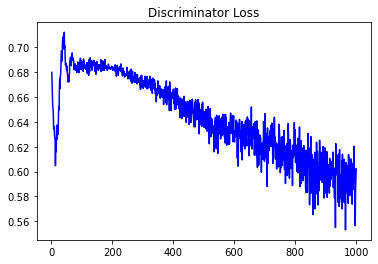

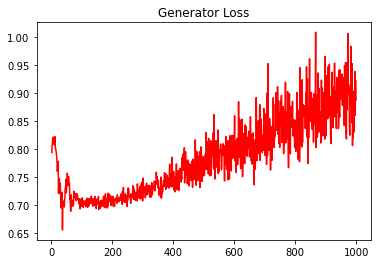

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4515164520954713


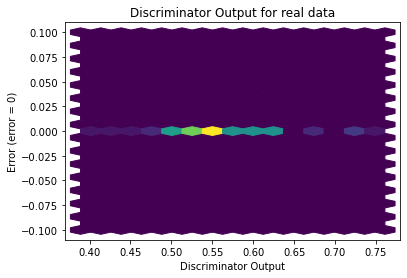

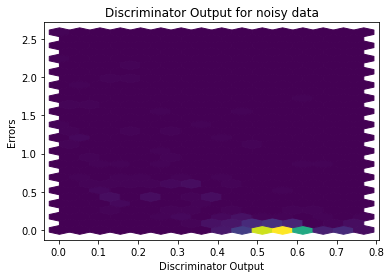

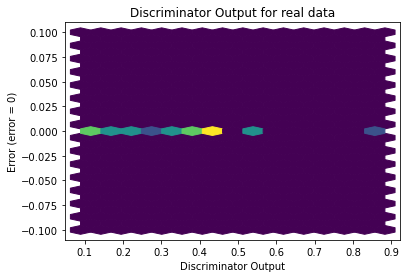

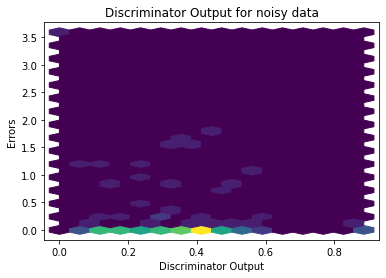

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


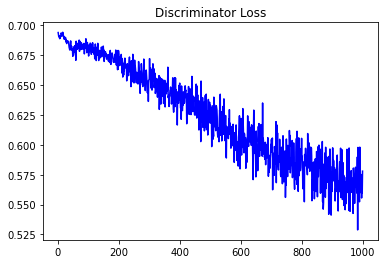

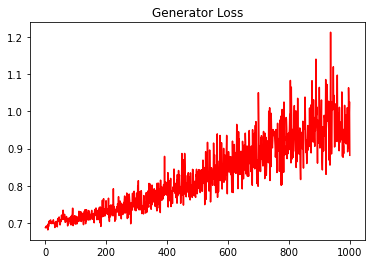

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.48242130483919754


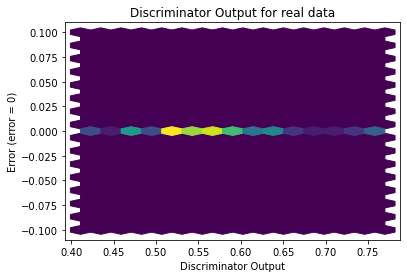

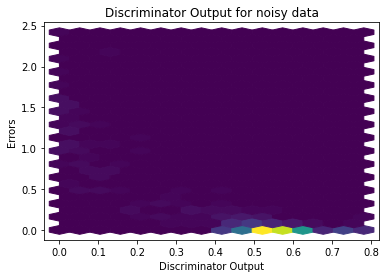

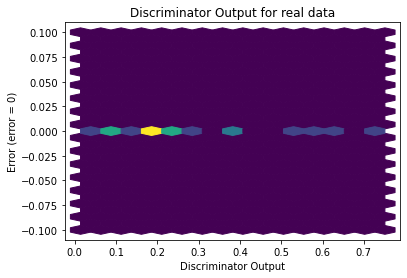

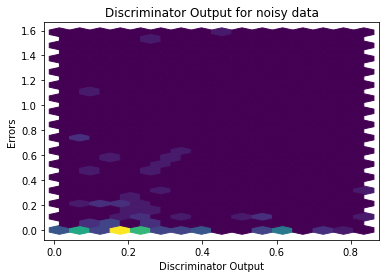

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8708]], requires_grad=True)
